### Введение в обработку естественного языка. Урок 5. Свёрточные сети для анализа текста.

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams.update({'figure.figsize': (12,6)})
matplotlib.rcParams["axes.grid"] = True

In [2]:
import nltk
from stop_words import get_stop_words
from pymorphy2 import MorphAnalyzer
from string import punctuation
import re
from tqdm.notebook import tqdm

In [3]:
# Загрузка данных
data = pd.read_excel("отзывы за лето.xls")
data.head()

,Rating,Content,Date
0,5,It just works!,2017-08-14
1,4,В целом удобноное приложение...из минусов хотя...,2017-08-14
2,5,Отлично все,2017-08-14
3,5,Стал зависать на 1% работы антивируса. Дальше ...,2017-08-14
4,5,"Очень удобно, работает быстро.",2017-08-14


In [4]:
rating = data['Rating'].value_counts()
rating

5    14586
1     2276
4     2138
3      911
2      748
Name: Rating, dtype: int64

<BarContainer object of 5 artists>

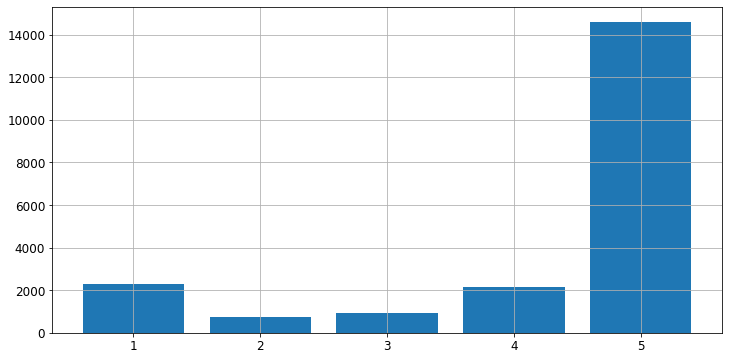

In [5]:
plt.bar(rating.index,rating)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20659 entries, 0 to 20658
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rating   20659 non-null  int64 
 1   Content  20656 non-null  object
 2   Date     20659 non-null  object
dtypes: int64(1), object(2)
memory usage: 484.3+ KB


In [7]:
data.loc[data['Rating'] == 3, 'Content'].sample(10, random_state=42)

16552                 Ника не могу перевести деньги в Крым
17847    Приложение удобное, но часто вылетает после вв...
12852    Смущает простота входа в приложение. Вводится ...
8722               Пропала вторая карта после перезапуска.
8599     Запуск приложения со всеми проверкам три минут...
19408    Исправьте пожалуйста приложение. После последн...
7652                Нет доступа оплаты к некоторым услугам
15617    Перестал работать чат с банком. Пропала вся пе...
5871     Все было бы неплохо, но...при входе в приложен...
728      Постоянный глюк! При входе в приложение приход...
Name: Content, dtype: object

In [8]:
def targ(x):
    r = 0
    if x > 3:
        r = 1
    return r

In [9]:
data['target'] = data['Rating'].apply(lambda x:  targ(x))

In [10]:
data.head(10)

,Rating,Content,Date,target
0,5,It just works!,2017-08-14,1
1,4,В целом удобноное приложение...из минусов хотя...,2017-08-14,1
2,5,Отлично все,2017-08-14,1
3,5,Стал зависать на 1% работы антивируса. Дальше ...,2017-08-14,1
4,5,"Очень удобно, работает быстро.",2017-08-14,1
5,5,Всё удобно норм 👍👍👍,2017-08-14,1
6,5,Очень удобное приложение.,2017-08-14,1
7,5,Все устраивает,2017-08-14,1
8,5,У меня работает все четко. В отличии от банком...,2017-08-14,1
9,5,Очень все хорошо👍,2017-08-14,1


In [11]:
stop_words = set(get_stop_words("ru"))
morpher = MorphAnalyzer()

def preprocess_text(txt):
    txt = str(txt).lower()
    txt = txt.replace("ё", "е")
    txt = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', txt)
    txt = re.sub('@[^\s]+', ' ', txt)
    txt = re.sub('[^a-zA-Zа-яА-Я]+', ' ', txt)
    txt = re.sub(' +', ' ', txt)
    txt = re.sub("\sне", "не", txt)
    txt = [morpher.parse(word)[0].normal_form for word in txt.split() if word not in stop_words]
    return " ".join(txt)

data['Content'] = data['Content'].apply(preprocess_text)

In [12]:
data.head(10)

,Rating,Content,Date,target
0,5,it just works,2017-08-14,1
1,4,целое удобноной приложение минус хотеть большо...,2017-08-14,1
2,5,отлично,2017-08-14,1
3,5,зависать работа антивирус ранее пользоваться н...,2017-08-14,1
4,5,удобно работать быстро,2017-08-14,1
5,5,удобно норма,2017-08-14,1
6,5,удобный приложение,2017-08-14,1
7,5,устраивать,2017-08-14,1
8,5,работать чётко отличие банкомат вечно зависать...,2017-08-14,1
9,5,,2017-08-14,1


In [13]:
data = data[data['Content']!='']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['Content'], data['target'], test_size=0.2,
                                                    random_state=42, stratify=data['target'])

In [15]:
X_train

20133    вернуть старый версия программа сделать обязат...
9035     удобно быстро какой сложность использованиина ...
4625                                                 пипец
9264                                           превосходно
6312                                               отлично
                               ...                        
9781                 появиться антивирус приложение тупить
7666                                                удобно
11158                               отлично большой помощь
4392     тоня сохраняться сообщениян отправленныен вход...
20597                                         объновляться
Name: Content, Length: 15920, dtype: object

In [16]:
y_train

20133    0
9035     1
4625     0
9264     1
6312     1
        ..
9781     1
7666     1
11158    1
4392     1
20597    0
Name: target, Length: 15920, dtype: int64

In [17]:
train_corpus = ' '.join(X_train.values)

In [18]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")

tokens = word_tokenize(train_corpus)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
# Отфильтруем данные и соберём в корпус N наиболее частых токенов
tokens_filtered = [word for word in tokens if word.isalnum() & (len(word) > 2)]

In [20]:
from nltk.probability import FreqDist

max_words = 2000
dist = FreqDist(tokens_filtered)
tokens_filtered_top = [pair[0] for pair in dist.most_common(max_words-1)]

In [21]:
tokens_filtered_top[:10]

['приложение',
 'удобно',
 'работать',
 'удобный',
 'отлично',
 'нравиться',
 'отличный',
 'хороший',
 'телефон',
 'супер']

In [22]:
vocabulary = {v: k for k, v in dict(enumerate(tokens_filtered_top, 1)).items()}

In [23]:
def text_to_sequence(text, maxlen):
    result = []
    tokens = word_tokenize(text.lower())
    tokens_filtered = [word for word in tokens if word.isalnum()]
    for word in tokens_filtered:
        if word in vocabulary:
            result.append(vocabulary[word])
    padding = [0]*(maxlen-len(result))
    return result[-maxlen:]+padding

In [24]:
max_len = 100
x_train = np.asarray([text_to_sequence(text, max_len) for text in X_train.values], dtype=np.int32)
x_test  = np.asarray([text_to_sequence(text, max_len) for text in X_test.values], dtype=np.int32)

In [25]:
x_train.shape

(15920, 100)

In [26]:
x_train[1]

array([   2,   11,   71, 1503,  155,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])

### Keras model

In [27]:
import tensorflow as tf

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [28]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Input, Embedding, Conv1D
from tensorflow.keras.layers import GlobalMaxPool1D, AveragePooling1D, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import TensorBoard 
from tensorflow.keras.backend import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
num_classes = 2
y_train = keras.utils.to_categorical(y_train.values, num_classes)
y_test  = keras.utils.to_categorical(y_test.values, num_classes)

In [30]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(Conv1D(128, 3))
model.add(Activation("relu"))
model.add(GlobalMaxPool1D())
model.add(Dense(10))
model.add(Activation("relu"))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [31]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=[keras.metrics.AUC()])

In [32]:
epochs = 4
batch_size = 512

early_stopping=EarlyStopping(monitor='val_loss')  

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 14328 samples, validate on 1592 samples
Epoch 1/4
14328/14328 [==============================] - 2s 157us/sample - loss: 0.5302 - auc: 0.8277 - val_loss: 0.4108 - val_auc: 0.9384
Epoch 2/4
14328/14328 [==============================] - 0s 31us/sample - loss: 0.3249 - auc: 0.9406 - val_loss: 0.2581 - val_auc: 0.9632
Epoch 3/4
14328/14328 [==============================] - 0s 31us/sample - loss: 0.2262 - auc: 0.9697 - val_loss: 0.2167 - val_auc: 0.9718
Epoch 4/4
14328/14328 [==============================] - 0s 31us/sample - loss: 0.1879 - auc: 0.9784 - val_loss: 0.2081 - val_auc: 0.9736


In [33]:
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)

print('Test score:', score[0])
print('Test accuracy:', score[1])

3981/3981 [==============================] - 0s 19us/sample - loss: 0.2159 - auc: 0.9718
Test score: 0.21587782111547604
Test accuracy: 0.9718426


#### 2. Берём предобученный word2vec и его эмбедингами инициализируем сетку

In [34]:
from gensim.models import Word2Vec

In [35]:
data.head(10)

,Rating,Content,Date,target
0,5,it just works,2017-08-14,1
1,4,целое удобноной приложение минус хотеть большо...,2017-08-14,1
2,5,отлично,2017-08-14,1
3,5,зависать работа антивирус ранее пользоваться н...,2017-08-14,1
4,5,удобно работать быстро,2017-08-14,1
5,5,удобно норма,2017-08-14,1
6,5,удобный приложение,2017-08-14,1
7,5,устраивать,2017-08-14,1
8,5,работать чётко отличие банкомат вечно зависать...,2017-08-14,1
10,5,ок,2017-08-14,1


In [36]:
data['text_tok'] = data['Content'].apply(word_tokenize)

w2v_model = Word2Vec(data['text_tok'], size=128, window=5, min_count=1, workers=8)
w2v_model.train(data['text_tok'], total_examples=data['text_tok'].shape[0], epochs=20)

(1638962, 2044040)

In [37]:
DIM = w2v_model.vector_size
NUM = len(tokens_filtered_top) + 1
# Инициализируем матрицу embedding слоя нулями
embedding_matrix = np.zeros((NUM, DIM))
# Добавляем NUM наиболее часто встречающихся слов из обучающей выборки в embedding слой
for item in vocabulary.items():
    if item[1] >= NUM:
        break
    if item[0] in w2v_model.wv.vocab.keys():
        embedding_matrix[item[1]] = w2v_model.wv[item[0]]

In [38]:
model = Sequential()
# Сначала замораживаем веса слоя
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len, weights=[embedding_matrix], trainable=False))
model.add(Conv1D(128, 3))
model.add(Activation("relu"))
model.add(GlobalMaxPool1D())
model.add(Dense(10))
model.add(Activation("relu"))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [39]:
epochs = 20
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=[keras.metrics.AUC()])
early_stopping = EarlyStopping(monitor='val_loss')

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[early_stopping])

Train on 14328 samples, validate on 1592 samples
Epoch 1/20
14328/14328 [==============================] - 1s 49us/sample - loss: 0.3291 - auc_1: 0.9343 - val_loss: 0.2613 - val_auc_1: 0.9575
Epoch 2/20
14328/14328 [==============================] - 0s 20us/sample - loss: 0.2555 - auc_1: 0.9592 - val_loss: 0.2461 - val_auc_1: 0.9622
Epoch 3/20
14328/14328 [==============================] - 0s 20us/sample - loss: 0.2416 - auc_1: 0.9639 - val_loss: 0.2363 - val_auc_1: 0.9647
Epoch 4/20
14328/14328 [==============================] - 0s 20us/sample - loss: 0.2307 - auc_1: 0.9675 - val_loss: 0.2334 - val_auc_1: 0.9654
Epoch 5/20
14328/14328 [==============================] - 0s 19us/sample - loss: 0.2232 - auc_1: 0.9695 - val_loss: 0.2347 - val_auc_1: 0.9651


In [40]:
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)

print('Test score:', score[0])
print('Test accuracy:', score[1])

3981/3981 [==============================] - 0s 14us/sample - loss: 0.2352 - auc_1: 0.9651
Test score: 0.23516046866883109
Test accuracy: 0.96505755


In [41]:
# Размораживаем Embedding слой и дообучаем сеть
model.layers[1].trainable = True
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=[keras.metrics.AUC()])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 128)          256000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 98, 128)           49280     
_________________________________________________________________
activation_3 (Activation)    (None, 98, 128)           0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

In [42]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[early_stopping])

Train on 14328 samples, validate on 1592 samples
Epoch 1/20
14328/14328 [==============================] - 1s 50us/sample - loss: 0.2190 - auc_2: 0.9708 - val_loss: 0.2224 - val_auc_2: 0.9697
Epoch 2/20
14328/14328 [==============================] - 0s 20us/sample - loss: 0.2071 - auc_2: 0.9744 - val_loss: 0.2196 - val_auc_2: 0.9703
Epoch 3/20
14328/14328 [==============================] - 0s 20us/sample - loss: 0.2004 - auc_2: 0.9761 - val_loss: 0.2196 - val_auc_2: 0.9704


In [43]:
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)

print('Test score:', score[0])
print('Test accuracy:', score[1])

3981/3981 [==============================] - 0s 14us/sample - loss: 0.2233 - auc_2: 0.9692
Test score: 0.22334461810974524
Test accuracy: 0.969208
